In [1]:
import cv2 as cv
import numpy as np
import PIL
from math import pi
import math
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import skimage.io
from scipy import ndimage as ndi
from statistics import mean

print("Done")

Done


In [2]:
def do_image(original, thresh_lo, thresh_hi, erode_val, gauss_val, exponent, gauss_val2, R, G, B):
    # original = cv.cvtColor(cv.imread("download.png"), cv.COLOR_BGR2RGB)
    r_channel, g_channel, b_channel = cv.split(original)
    color_channels = [r_channel, g_channel, b_channel]
    alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 50 #creating a dummy alpha channel image.
    
    # fig, axs = plt.subplots(ncols = 3, figsize=(15, 15))
    
    border_int = 3
    img = cv.copyMakeBorder(cv.cvtColor(original, cv.COLOR_BGR2GRAY), border_int, border_int, border_int, border_int, cv.BORDER_CONSTANT, value=255)
    # axs[0].imshow(original)
    
    ret, thresh = cv.threshold(img, thresh_lo, thresh_hi, cv.THRESH_BINARY)
    dist = cv.distanceTransform(thresh, cv.DIST_L2, cv.DIST_MASK_PRECISE)
    dist = cv.GaussianBlur(dist, (gauss_val, gauss_val), 0)
    dist = dist[border_int:img.shape[0]-border_int, border_int:img.shape[1]-border_int]
    norm_dist = cv.normalize(dist, None, 0, 1.0, cv.NORM_MINMAX)
    # axs[1].imshow(norm_dist)
    alpha_channel = cv.bitwise_not((255 * norm_dist).astype(b_channel.dtype))
    
    kernel = np.ones((erode_val, erode_val), np.uint8)
    alpha_channel = cv.erode(alpha_channel, kernel)
    
    # axs[2].imshow(img_BGRA)
    
#     alpha_mult_temp = np.zeros_like(color_channels, dtype=float)
#     alpha_mult = np.zeros_like(alpha_channel, dtype=float)

#     for row in range(np.shape(color_channels)[1]):
#         for col in range(np.shape(color_channels)[2]):
#             for chan in range(np.shape(color_channels)[0]):
#                 alpha_mult_temp[chan][row][col] = pow(abs(int(color_channels[chan][row][col])-default_vals[chan])/default_vals[chan], exponent) * 5
#                 if chan % 3 == 2:
#                     if mean(alpha_mult_temp[..., row, col]) > 1:
#                         alpha_channel[row][col] = alpha_channel[row][col] * 1.0
#                     else:
#                         alpha_channel[row][col] = alpha_channel[row][col] * mean(alpha_mult_temp[..., row, col])
    
#     alpha_channel = cv.GaussianBlur(alpha_channel, (gauss_val2, gauss_val2), 0)

    img_BGRA = cv.merge((r_channel, g_channel, b_channel, alpha_channel))
    return img_BGRA, alpha_channel

def weight_func(markers, markers2):
    new_running_sum = 0
    for i, row in enumerate(markers):
        for j, cell in enumerate(row):
            if markers[i][j] == markers2[i][j]:
                new_running_sum = new_running_sum + 1
            else:
                new_running_sum = new_running_sum - 1
    return new_running_sum

print("Done")

Done


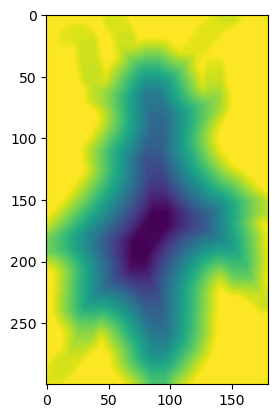

Starting sum: -52186


Monte Carlo Param Search::   0%|                           | 0/1000000 [00:00<?, ?iteration/s, Best=-52186, Sum=-53722]

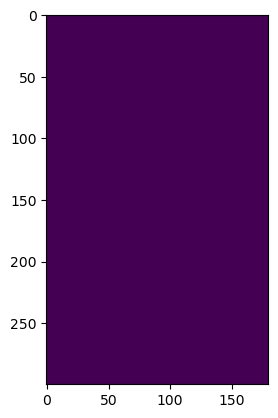

Monte Carlo Param Search::   0%|                | 5/1000000 [00:00<14:34:38, 19.06iteration/s, Best=-35790, Sum=-38482]

[7, 189, 27, 7, 4.58, 1, 80, 145, 180]


Monte Carlo Param Search::   0%|                | 55/1000000 [00:01<5:27:29, 50.89iteration/s, Best=-35790, Sum=-35790]

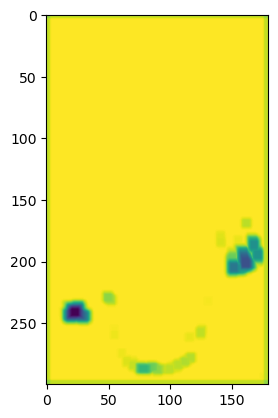

Monte Carlo Param Search::   0%|                | 64/1000000 [00:01<6:27:35, 43.00iteration/s, Best=-35766, Sum=-53738]

[128, 129, 5, 7, 8.93, 9, 83, 129, 196]


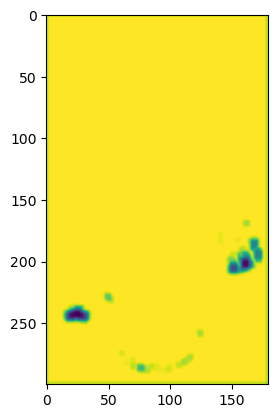

Monte Carlo Param Search::   0%|                | 75/1000000 [00:01<6:35:47, 42.11iteration/s, Best=-35696, Sum=-53790]

[133, 152, 3, 5, 6.45, 5, 82, 121, 195]


Monte Carlo Param Search::   0%|               | 184/1000000 [00:03<5:23:36, 51.49iteration/s, Best=-35696, Sum=-53784]

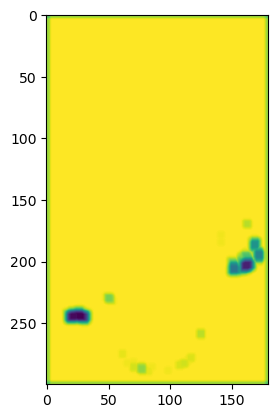

Monte Carlo Param Search::   0%|               | 193/1000000 [00:04<6:43:15, 41.32iteration/s, Best=-34554, Sum=-47500]

[135, 175, 4, 7, 5.15, 7, 111, 183, 218]


Monte Carlo Param Search::   0%|               | 717/1000000 [00:14<5:32:51, 50.03iteration/s, Best=-34554, Sum=-53692]

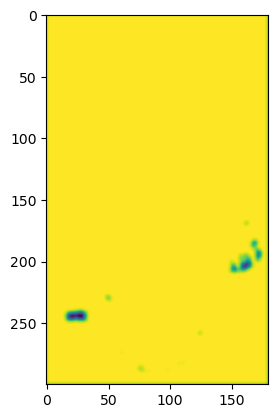

Monte Carlo Param Search::   0%|               | 728/1000000 [00:14<6:03:44, 45.79iteration/s, Best=-34518, Sum=-53768]

[139, 194, 1, 7, 8.49, 5, 62, 200, 44]


Monte Carlo Param Search::   0%|              | 3010/1000000 [00:58<5:19:02, 52.08iteration/s, Best=-34518, Sum=-40830]

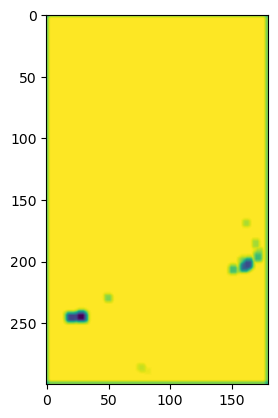

Monte Carlo Param Search::   0%|              | 3020/1000000 [00:59<5:59:49, 46.18iteration/s, Best=-34512, Sum=-53746]

[144, 171, 0, 7, 0.44, 3, -8, 496, -40]


Monte Carlo Param Search::   0%|              | 4485/1000000 [01:27<5:22:57, 51.38iteration/s, Best=-34512, Sum=-49644]

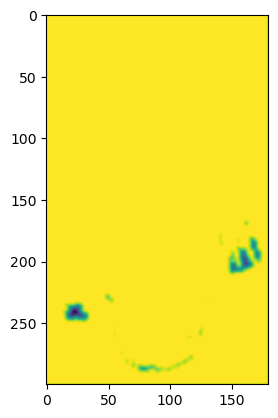

Monte Carlo Param Search::   0%|              | 4496/1000000 [01:28<6:00:39, 46.00iteration/s, Best=-34490, Sum=-35790]

[128, 128, 1, 5, 6.26, 1, 153, 532, -118]


Monte Carlo Param Search::   1%|              | 5400/1000000 [01:45<5:14:53, 52.64iteration/s, Best=-34490, Sum=-35790]

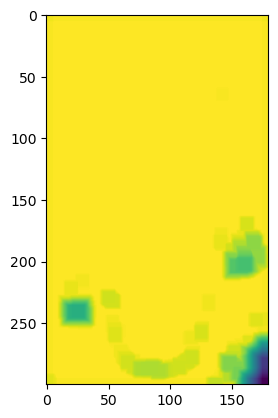

Monte Carlo Param Search::   1%|              | 5411/1000000 [01:45<5:54:10, 46.80iteration/s, Best=-32508, Sum=-44008]

[121, 190, 10, 3, 4.58, 9, 303, 520, -33]


Monte Carlo Param Search::   3%|▍            | 31348/1000000 [09:58<5:07:04, 52.57iteration/s, Best=-32508, Sum=-53668]

In [ ]:
# parameters
thresh_lo = 75
thresh_hi = 185
erode_val = 10
gauss_val = 9
exponent = 0.18
gauss_val2 = 3
R = 80
G = 146
B = 180
starting_R = R
starting_G = G
starting_B = B

default_vals = [R, G, B]

img = cv.cvtColor(cv.imread("new_download2.png"), cv.COLOR_BGR2RGB)
img2 = cv.imread("new_download.png")
starting_params = [thresh_lo, thresh_hi, erode_val, gauss_val, exponent, gauss_val2, R, G, B]

_, start_markers = do_image(img, *starting_params)
compare_img, start_markers2 = do_image(img2, *starting_params)
plt.imshow(start_markers2)
plt.show()
start_running_sum = weight_func(start_markers, start_markers2)
print("Starting sum: %d" % (start_running_sum))
best_params = starting_params
best_sum = start_running_sum

k = 0
iters = 1000000
with tqdm(total=iters, unit="iteration", desc=str("Monte Carlo Param Search:")) as pbar:
    while k < iters:
        thresh_hi = random.randint(1,255) # default == 255
        thresh_lo = random.randint(0, thresh_hi) # default == 0
        erode_val = random.randint(0, 30) # default == 3
        gauss_val = random.choice([1, 3, 5, 7, 9])
        exponent = random.randint(10, 1000) / 100
        gauss_val2 = random.choice([1, 3, 5, 7, 9])
        R = random.randint(R-5, R+5)
        G = random.randint(G-5, G+5)
        B = random.randint(B-5, B+5)
        _, markers = do_image(img, thresh_lo, thresh_hi, erode_val, gauss_val, exponent, gauss_val2, R, G, B)
        
        new_running_sum = weight_func(markers, start_markers2)
        if new_running_sum > best_sum:
            best_sum = new_running_sum
            best_params = [thresh_lo, thresh_hi, erode_val, gauss_val, exponent, gauss_val2, R, G, B]
            plt.imshow(do_image(img, *best_params)[1])
            plt.show()
            print(best_params)
        k = k + 1
        pbar.set_postfix(Sum = new_running_sum, Best = best_sum, refresh=True)
        pbar.update(1)

original_img, markers = do_image(img, *best_params)
fig, axs = plt.subplots(ncols = 4, figsize=(15, 15))
axs[0].imshow(compare_img)
axs[1].imshow(start_markers2)
axs[2].imshow(original_img)
axs[3].imshow(markers)

new_running_sum = weight_func(markers, start_markers2)
print(new_running_sum)
print(*best_params)